<a href="https://colab.research.google.com/github/cereenozarslan/Data-Science-Projects/blob/main/Spotify_Music_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Kütüphaneler ve Görsel Ayarlar Yüklendi ---

--- 2. Veri Seti Yüklendi ---
Veri Seti İlk 5 Satır:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                       

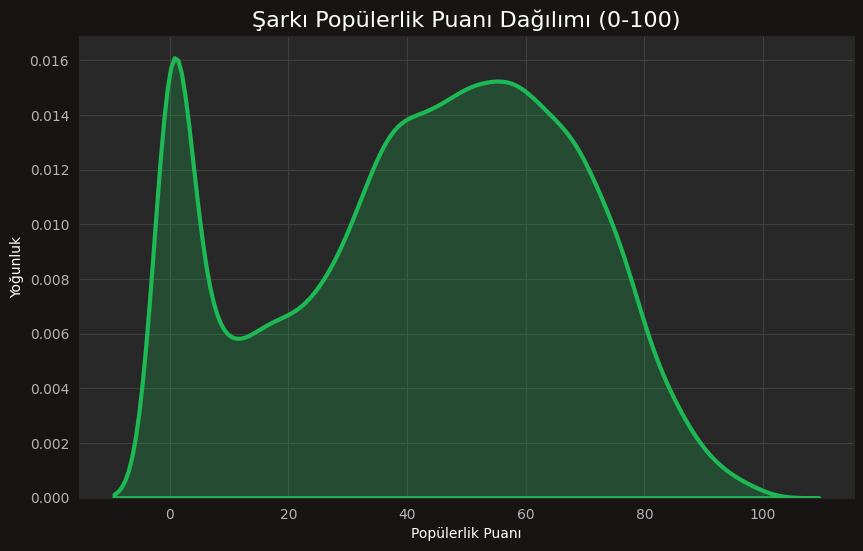


Popülerlik Sınıflandırma Eşiği (Medyan): 45.0


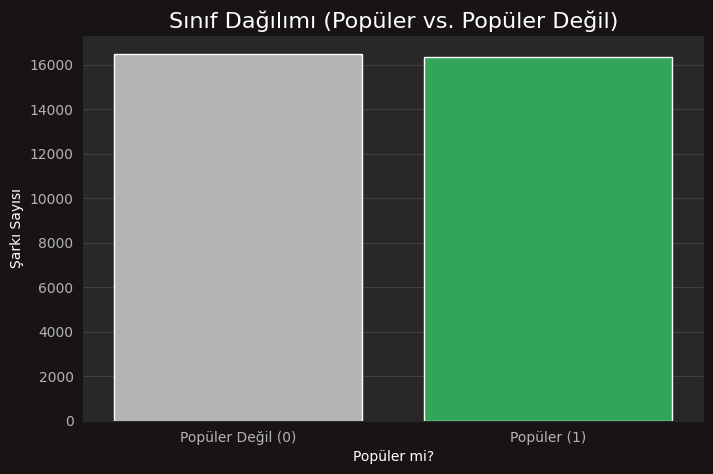

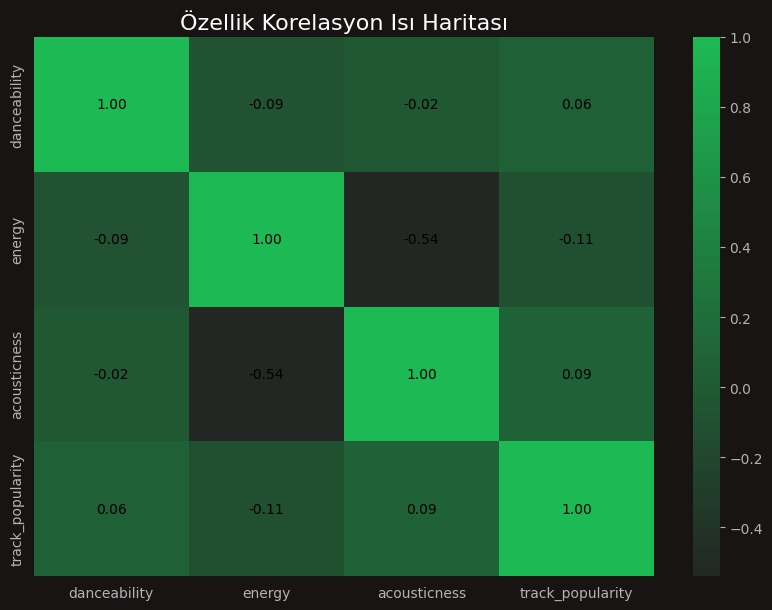


--- 5. Feature Engineering Tamamlandı ---
Özellik Seti (X) ilk 5 satır:
   danceability  energy  acousticness
0         0.748   0.916        0.1020
1         0.726   0.815        0.0724
2         0.675   0.931        0.0794
3         0.718   0.930        0.0287
4         0.650   0.833        0.0803

--- 6. Veri Seti Ayrıldı ---
Eğitim Seti Boyutu (X_train): (26266, 3)
Test Seti Boyutu (X_test):   (6567, 3)

--- 7. Veri Ölçeklendirildi ---
Ölçeklendirilmiş Eğitim Verisi (İlk Satır):
[-2.0581077   1.23741041 -0.79525908]

--- 8. Logistic Regression Modeli ---
Doğruluk Oranı (Accuracy): 0.5416
Sınıflandırma Raporu:
                   precision    recall  f1-score   support

Popüler Değil (0)       0.54      0.60      0.57      3297
      Popüler (1)       0.54      0.49      0.51      3270

         accuracy                           0.54      6567
        macro avg       0.54      0.54      0.54      6567
     weighted avg       0.54      0.54      0.54      6567


--- 9. Logistic Regre

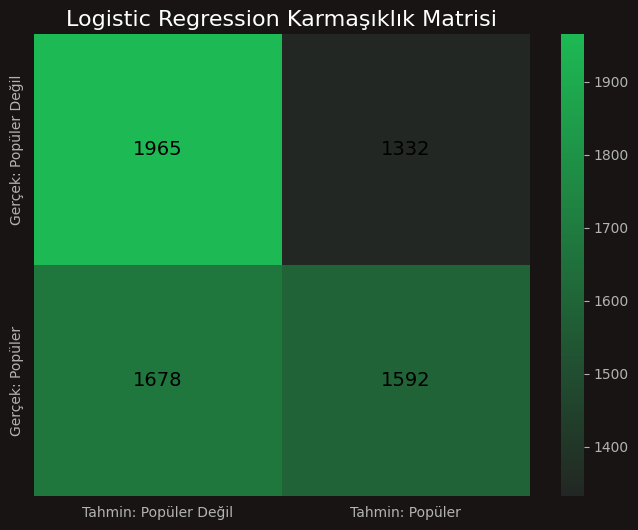


--- 10. Random Forest Modeli ---
Doğruluk Oranı (Accuracy): 0.6219
Sınıflandırma Raporu:
                   precision    recall  f1-score   support

Popüler Değil (0)       0.62      0.63      0.63      3297
      Popüler (1)       0.62      0.61      0.62      3270

         accuracy                           0.62      6567
        macro avg       0.62      0.62      0.62      6567
     weighted avg       0.62      0.62      0.62      6567


--- Random Forest Özellik Önem Grafiği Gösteriliyor ---


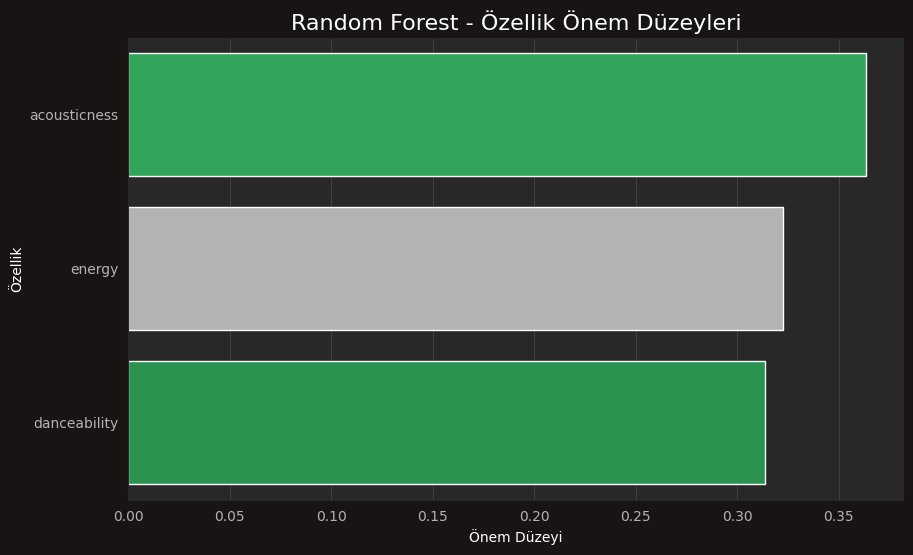


--- 11. Kişisel Tahmin Senaryosu ---
Senaryo 1 (Danceability: 0.85, Energy: 0.90, Acousticness: 0.05): TAHMİN: POPÜLER DEĞİL (Sınıf 0) - (Medyan 45 puanın altında)
Senaryo 2 (Danceability: 0.20, Energy: 0.25, Acousticness: 0.95): TAHMİN: POPÜLER DEĞİL (Sınıf 0) - (Medyan 45 puanın altında)

--- Proje Tamamlandı ---


In [1]:
# === SPOTIFY POPÜLERLİK TAHMİNİ: UÇTAN UCA MAKİNE ÖĞRENİMİ PROJESİ ===

# ---------------------------------
# 1. Gerekli Kütüphanelerin Import Edilmesi
# ---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# === Görsel Ayarlar ve Spotify Renk Paleti ===
warnings.filterwarnings('ignore')

# Spotify'ın ana renklerini tanımlayalım
SPOTIFY_GREEN = '#1DB954'
SPOTIFY_BLACK = '#191414'
SPOTIFY_LIGHT_GRAY = '#B3B3B3'
SPOTIFY_DARK_GRAY = '#282828'

# Spotify'ın "Dark Mode" arayüzünü taklit eden tema ayarı
sns.set_style("darkgrid", {
    "axes.facecolor": SPOTIFY_DARK_GRAY,
    "grid.color": "#404040",
    "figure.facecolor": SPOTIFY_BLACK,
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": SPOTIFY_LIGHT_GRAY,
    "ytick.color": SPOTIFY_LIGHT_GRAY,
    "axes.edgecolor": SPOTIFY_DARK_GRAY
})

# Spotify Yeşilini içeren özel bir renk haritası (colormap) ve palet
SPOTIFY_CMAP = sns.dark_palette(SPOTIFY_GREEN, as_cmap=True)
SPOTIFY_PALETTE = [SPOTIFY_GREEN, SPOTIFY_LIGHT_GRAY, "#17A54A"]

print("--- 1. Kütüphaneler ve Görsel Ayarlar Yüklendi ---")

# ---------------------------------
# 2. Veri Setinin URL'den Alınması
# ---------------------------------
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
df = pd.read_csv(url)

print("\n--- 2. Veri Seti Yüklendi ---")
print("Veri Seti İlk 5 Satır:")
print(df.head())

# ---------------------------------
# 3. Veri Temizleme ve Hazırlama
# ---------------------------------
# Modelimizde sadece bu 3 özelliği ve hedef değişkeni kullanacağız
features_to_keep = ['danceability', 'energy', 'acousticness', 'track_popularity']
df_model = df[features_to_keep].copy()

# Eksik veri kontrolü
print("\n--- 3. Veri Temizleme ve Hazırlama ---")
print("Eksik Veri Analizi (Seçilen Sütunlar):")
print(df_model.isnull().sum())

# ---------------------------------
# 4. EDA (Keşifçi Veri Analizi)
# ---------------------------------
print("\n--- 4. EDA Başlatılıyor (Grafikler Gösterilecek) ---")

# 4.1. Popülerlik Puanının Dağılımı (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(df_model['track_popularity'], fill=True, color=SPOTIFY_GREEN, lw=3)
plt.title('Şarkı Popülerlik Puanı Dağılımı (0-100)', fontsize=16, color='white')
plt.xlabel('Popülerlik Puanı')
plt.ylabel('Yoğunluk')
plt.show()

# --- Hedef Değişkeni Oluşturma (Sınıflandırma için) ---
# Popülerlik eşiğini (medyan) bulalım
popularity_threshold = df_model['track_popularity'].median()
print(f"\nPopülerlik Sınıflandırma Eşiği (Medyan): {popularity_threshold}")

# 1 = Popüler, 0 = Popüler Değil
df_model['is_popular'] = (df_model['track_popularity'] > popularity_threshold).astype(int)

# 4.2. Sınıf Dağılımı (Count Plot)
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='is_popular', data=df_model, palette=[SPOTIFY_LIGHT_GRAY, SPOTIFY_GREEN])
plt.title('Sınıf Dağılımı (Popüler vs. Popüler Değil)', fontsize=16, color='white')
plt.xlabel('Popüler mi?')
plt.ylabel('Şarkı Sayısı')
ax.set_xticklabels(['Popüler Değil (0)', 'Popüler (1)'])
plt.show()

# 4.3. Özelliklerin Korelasyonu (Heatmap)
plt.figure(figsize=(10, 7))
corr = df_model[['danceability', 'energy', 'acousticness', 'track_popularity']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap=SPOTIFY_CMAP, annot_kws={"color": "black"})
plt.title('Özellik Korelasyon Isı Haritası', fontsize=16, color='white')
plt.show()

# ---------------------------------
# 5. Feature Engineering (Özellik Mühendisliği)
# ---------------------------------
# X: Bağımsız değişkenler (Özellikler)
X = df_model[['danceability', 'energy', 'acousticness']]
# y: Bağımlı değişken (Hedef)
y = df_model['is_popular']

print("\n--- 5. Feature Engineering Tamamlandı ---")
print("Özellik Seti (X) ilk 5 satır:")
print(X.head())

# ---------------------------------
# 6. Veriyi Eğitim ve Test Setlerine Ayırma
# ---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- 6. Veri Seti Ayrıldı ---")
print(f"Eğitim Seti Boyutu (X_train): {X_train.shape}")
print(f"Test Seti Boyutu (X_test):   {X_test.shape}")

# ---------------------------------
# 7. StandardScaler (Veri Ölçeklendirme)
# ---------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- 7. Veri Ölçeklendirildi ---")
print("Ölçeklendirilmiş Eğitim Verisi (İlk Satır):")
print(X_train_scaled[0])

# ---------------------------------
# 8. LogisticRegression Modeli Kurma ve Eğitme
# ---------------------------------
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)

print("\n--- 8. Logistic Regression Modeli ---")
print(f"Doğruluk Oranı (Accuracy): {accuracy_log:.4f}")
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_log, target_names=['Popüler Değil (0)', 'Popüler (1)']))

# ---------------------------------
# 9. Confusion Matrix (Karmaşıklık Matrisi) - Logistic Regression
# ---------------------------------
print("\n--- 9. Logistic Regression Karmaşıklık Matrisi Gösteriliyor ---")
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap=SPOTIFY_CMAP,
            xticklabels=['Tahmin: Popüler Değil', 'Tahmin: Popüler'],
            yticklabels=['Gerçek: Popüler Değil', 'Gerçek: Popüler'],
            annot_kws={"color": "black", "size": 14})
plt.title('Logistic Regression Karmaşıklık Matrisi', fontsize=16, color='white')
plt.show()

# ---------------------------------
# 10. Bonus: RandomForestClassifier ve Özellik Önemi
# ---------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\n--- 10. Random Forest Modeli ---")
print(f"Doğruluk Oranı (Accuracy): {accuracy_rf:.4f}")
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rf, target_names=['Popüler Değil (0)', 'Popüler (1)']))

# --- Özellik Önem Grafiği ---
print("\n--- Random Forest Özellik Önem Grafiği Gösteriliyor ---")
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=SPOTIFY_PALETTE)
plt.title('Random Forest - Özellik Önem Düzeyleri', fontsize=16, color='white')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Özellik')
plt.show()

# ---------------------------------
# 11. Kişisel Tahmin Senaryosu
# ---------------------------------
print("\n--- 11. Kişisel Tahmin Senaryosu ---")

# Senaryo 1: Yüksek Dans Edilebilirlik, Yüksek Enerji, Düşük Akustik
sarki_1 = [[0.85, 0.90, 0.05]]
# Senaryo 2: Düşük Dans Edilebilirlik, Düşük Enerji, Yüksek Akustik
sarki_2 = [[0.20, 0.25, 0.95]]

# 1. Verileri ölçeklendirme
sarki_1_scaled = scaler.transform(sarki_1)
sarki_2_scaled = scaler.transform(sarki_2)

# 2. Tahminleri yapma (Daha iyi olan RF modeli ile)
tahmin_1 = rf_model.predict(sarki_1_scaled)
tahmin_2 = rf_model.predict(sarki_2_scaled)

# 3. Sonuçları yorumlama
def yorumla(tahmin):
    # Calculate popularity threshold based on the loaded data
    popularity_threshold = df_model['track_popularity'].median()
    if tahmin[0] == 1:
        return f"TAHMİN: POPÜLER (Sınıf 1) - (Medyan {popularity_threshold:.0f} puanın üstünde)"
    else:
        return f"TAHMİN: POPÜLER DEĞİL (Sınıf 0) - (Medyan {popularity_threshold:.0f} puanın altında)"

print(f"Senaryo 1 (Danceability: 0.85, Energy: 0.90, Acousticness: 0.05): {yorumla(tahmin_1)}")
print(f"Senaryo 2 (Danceability: 0.20, Energy: 0.25, Acousticness: 0.95): {yorumla(tahmin_2)}")
print("\n--- Proje Tamamlandı ---")